# OBJECTIVE

#### Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

In [1]:
# Importing imp. libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
data=pd.read_csv(r"C:\\Users\\91961\\OneDrive\\Desktop\\kritika\\desktop\\kaatru.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.shape

(730, 16)

In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Outcomes:
Its found out that there is no null values as in columns of the given datasets.

The datatype of columns are int, float, except dteday which is object.

Further, to check the unique value,columnwise.

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Since we find out columns(season, yr, mnth, holiday, weekday, workingday,weathersit) max values are ranging from 1-6 mostly.

checking their unique values.


In [8]:
data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
data['yr'].unique()

array([0, 1], dtype=int64)

In [10]:
data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
data['holiday'].unique()

array([0, 1], dtype=int64)

In [12]:
data['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [13]:
data['workingday'].unique()

array([1, 0], dtype=int64)

In [14]:
data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

#### Outcomes:
According to the unique values of the columns mentioned above, they can be changed into categorical dtypes.

In [15]:
# Checking for duplicate values: by dropping duplicate values.Let's check after copying values
data_d=data.copy()
data_d.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [16]:
data_d.shape

(730, 16)

In [17]:
data.shape

(730, 16)

#### Outcomes

There are no duplicate values in the dataset. [Proof: dataset have same number of rows as in the original one, after dropping duplicates.]

#### Categorising the features which found out to be: that those features can be transformed to categorical.


In [18]:
# Changing column dtype to category for mnth,weekday,weathersit,season
data_cat=data.copy()
data_cat['mnth']=data_cat['mnth'].astype('category')
data_cat['weekday']=data_cat['weekday'].astype('category')
data_cat['weathersit']=data_cat['weathersit'].astype('category')
data_cat['season']=data_cat['season'].astype('category')

In [19]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [20]:
# Getting dummy variables through one hot encoding
data_cat=pd.get_dummies(data=data_cat,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [21]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   dteday        730 non-null    object 
 2   yr            730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   workingday    730 non-null    int64  
 5   temp          730 non-null    float64
 6   atemp         730 non-null    float64
 7   hum           730 non-null    float64
 8   windspeed     730 non-null    float64
 9   casual        730 non-null    int64  
 10  registered    730 non-null    int64  
 11  cnt           730 non-null    int64  
 12  season_2      730 non-null    uint8  
 13  season_3      730 non-null    uint8  
 14  season_4      730 non-null    uint8  
 15  mnth_2        730 non-null    uint8  
 16  mnth_3        730 non-null    uint8  
 17  mnth_4        730 non-null    uint8  
 18  mnth_5        730 non-null    

By analysing, instant seems to be column containing ids, casual,registered seems to be different categories of bikes shared and dteday has the dates as object,and we already have days count for these.
Rather on these, Since the focus is on to check the significant variables for the total demand of bikes. We can drop these columns. 

In [22]:
data_new=data_cat.drop(['instant','dteday','casual','registered'],axis=1)

In [23]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

# Data Visualisation

### 1. Making pairplot on data_new(numeric columns)

In [24]:
pairplot_data=data_new[['temp','atemp','hum','windspeed','cnt']]

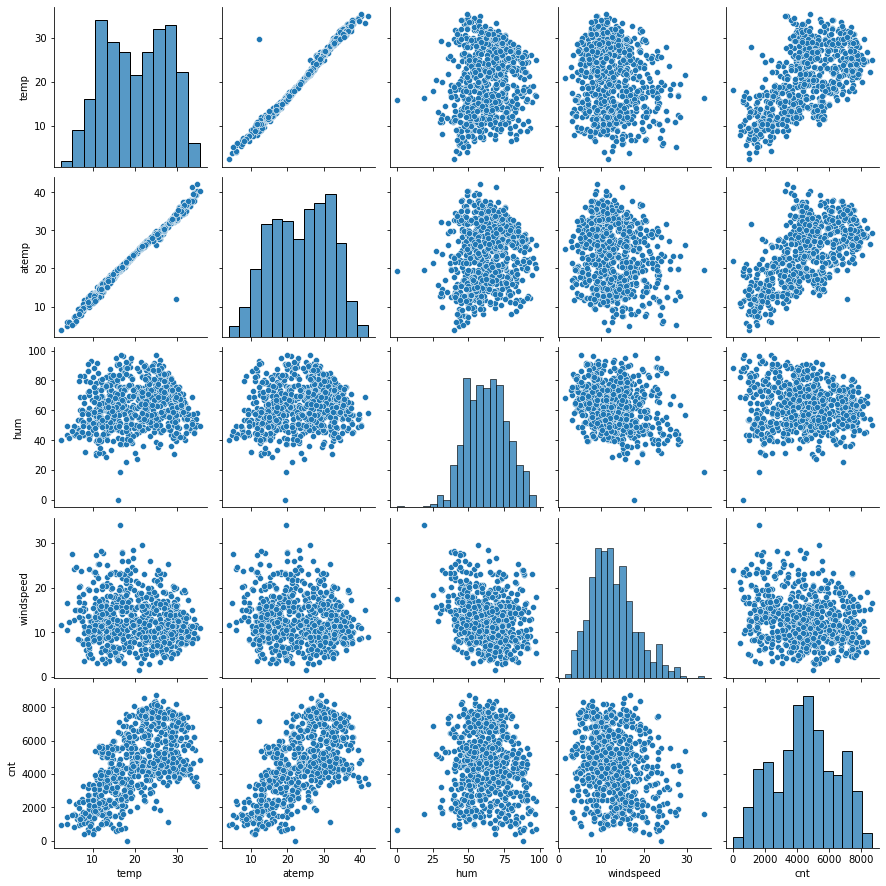

In [25]:
sns.pairplot(pairplot_data)
plt.show()

### Outcomes:
1. From the above pairplot, it is cleared that, features temp, atemp are in linear relationshio with dependent feature cnt respectively.
2. temp and atemp are in relationship with each other.

### 2. Checking through Correlation matrix

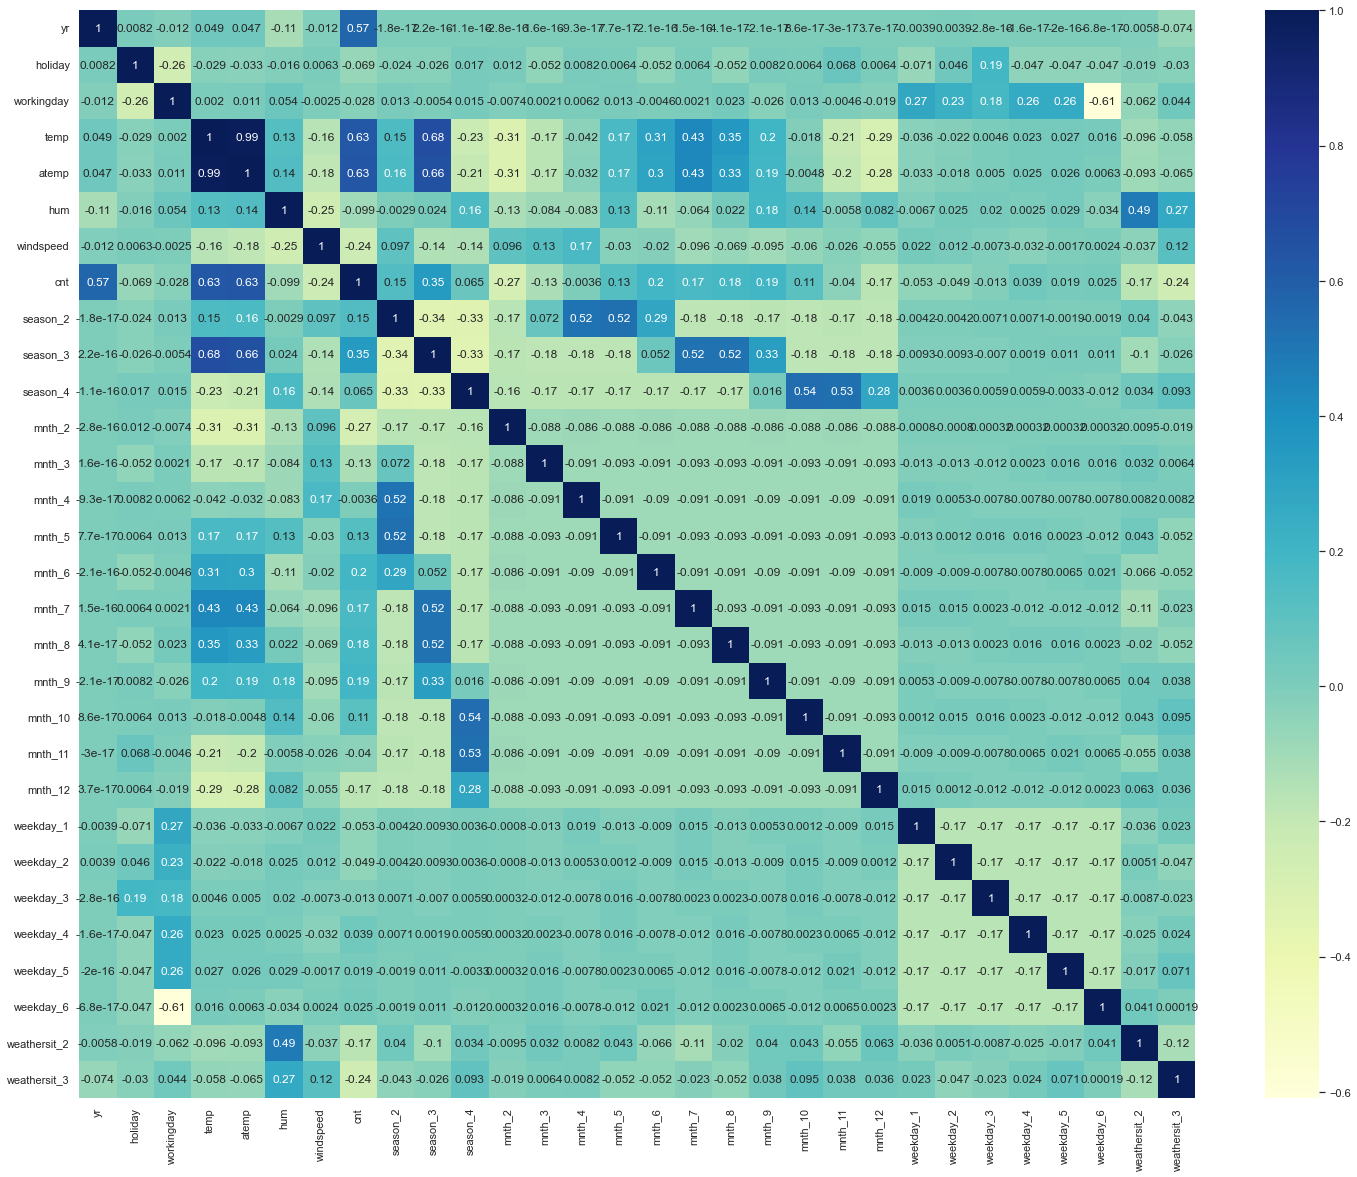

In [26]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(data_new.corr(), annot=True, cmap="YlGnBu",)
plt.show()

### Outcomes
1. This heat map showing correlation and multicorrelation between different variables.
2. Considering cnt we can see this is high correlated with: yr,temp,atemp,season3,weathersit_3 (taken nearly to -1,1)

### 3. Checking through boxplot (outliers)

In [27]:
import warnings
warnings.filterwarnings('ignore')

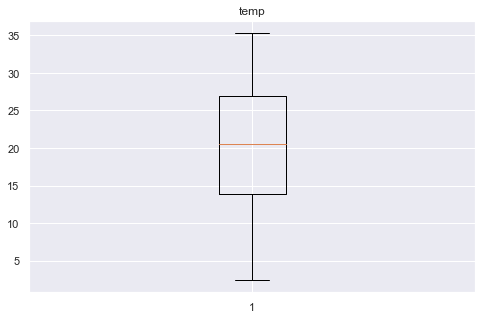

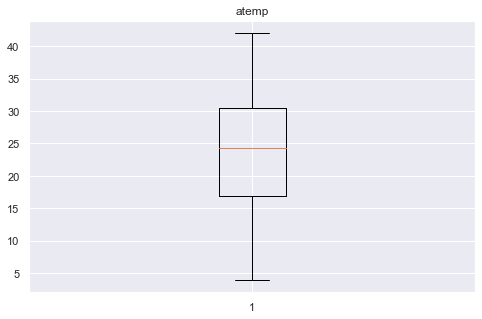

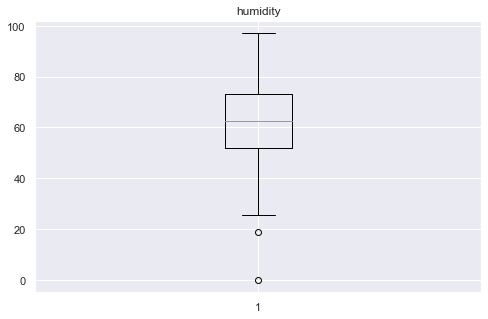

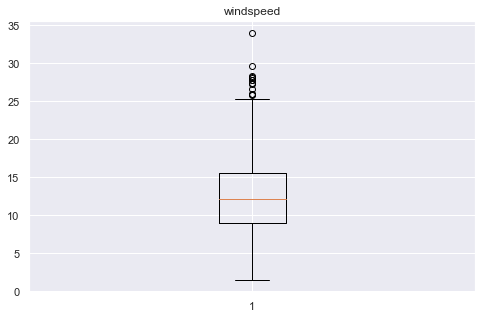

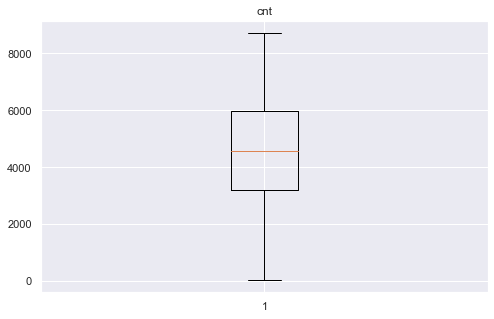

In [28]:
#For numeric data
fig1=plt.figure(figsize=(8,5))
plt.boxplot(data_new[['temp']])
plt.title('temp')
fig1.show()

fig2=plt.figure(figsize=(8,5))
plt.boxplot(data_new[['atemp']])
plt.title('atemp')
fig2.show()

fig3=plt.figure(figsize=(8,5))
plt.boxplot(data_new[['hum']])
plt.title('humidity')
fig3.show()

fig4=plt.figure(figsize=(8,5))
plt.boxplot(data_new[['windspeed']])
plt.title('windspeed')
fig4.show()

fig5=plt.figure(figsize=(8,5))
plt.boxplot(data_new[['cnt']])
plt.title('cnt')
fig5.show()

### Outcomes
1. It can be seen there are no outliers considerably in the features(temp,atemp,cnt) which are correlated(analysed through above visualisations).
2. Humidity and windspeed feature has some outliers.

### 4. Checking for the relation between categorical features and cnt using boxplot.

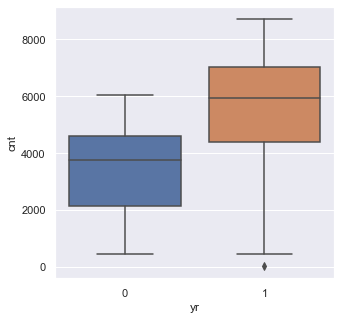

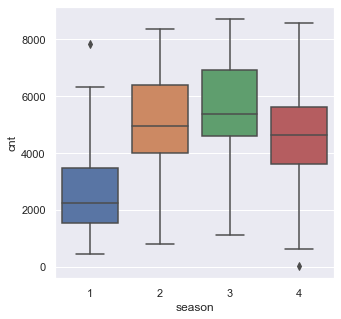

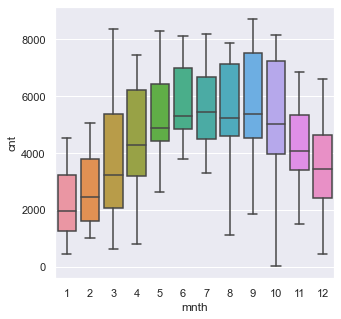

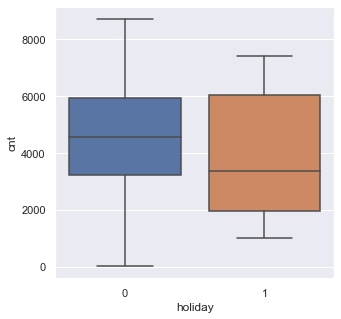

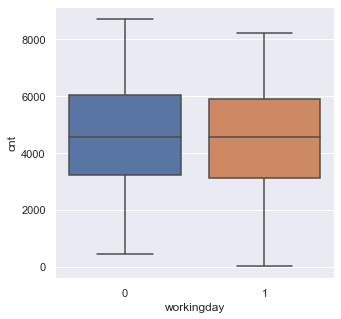

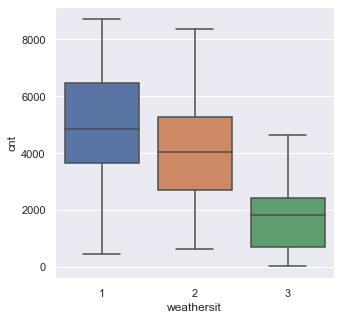

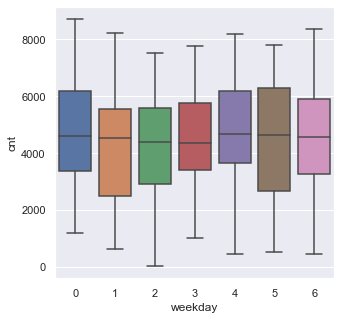

In [29]:
fig1=plt.figure(figsize=(5,5))
sns.boxplot(x='yr',y='cnt',data=data)
fig1.show()

fig2=plt.figure(figsize=(5,5))
sns.boxplot(x='season',y='cnt',data=data)
fig2.show()

fig3=plt.figure(figsize=(5,5))
sns.boxplot(x='mnth',y='cnt',data=data)
fig3.show()

fig4=plt.figure(figsize=(5,5))
sns.boxplot(x='holiday',y='cnt',data=data)
fig4.show()

fig5=plt.figure(figsize=(5,5))
sns.boxplot(x='workingday',y='cnt',data=data)
fig5.show()

fig6=plt.figure(figsize=(5,5))
sns.boxplot(x='weathersit',y='cnt',data=data)
fig6.show()

fig7=plt.figure(figsize=(5,5))
sns.boxplot(x='weekday',y='cnt',data=data)
fig7.show()

### Outcomes
1. yr & cnt:  it can be seen that demand of bike sharing is increased from 2018 with median(approx 3900) to 2019 with median(app 6000).
2. season & snt:  it can be seen that demand for bike sharing is more in season3 followed by season2, season4, season1. It can predict cnt well.
3. mnth & cnt:  higher bike demand can be seen in mnth7 and(then mnth: 9,6,8 respectively). This can also predict cnt well.
4. holiday and cnt:   Almost more than 50% of bike demand is seen when no holiday.
5. workingday & cnt:  Equivalently bike demands are there on workingday or not workingday.
6. weathersit & cnt:  higher bike demands can be seen in weathersit 1 then weathersit 2 and 3. It can also predict cnt well.
7. weekday & cnt:   Almost equivalent bike demands are seen on different week days.
    

### Checking for normality (numerical variables)

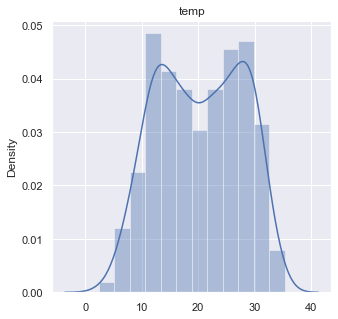

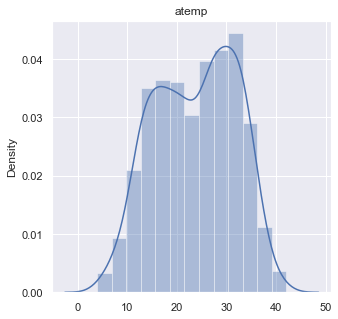

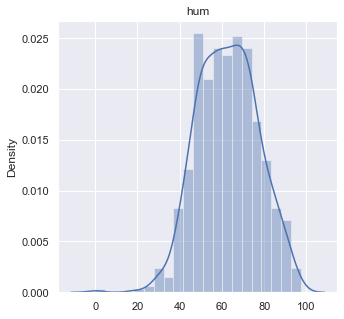

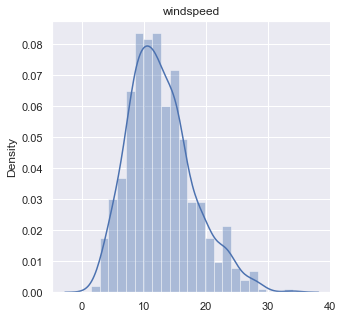

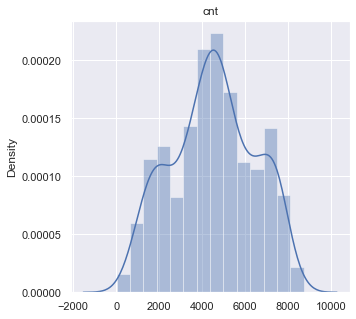

In [30]:
fig1=plt.figure(figsize=(5,5))
sns.distplot(data_new[['temp']])
plt.title('temp')
fig1.show()

fig2=plt.figure(figsize=(5,5))
sns.distplot(data_new[['atemp']])
plt.title('atemp')
fig2.show()

fig3=plt.figure(figsize=(5,5))
sns.distplot(data_new[['hum']])
plt.title('hum')
fig3.show()

fig4=plt.figure(figsize=(5,5))
sns.distplot(data_new[['windspeed']])
plt.title('windspeed')
fig4.show()

fig5=plt.figure(figsize=(5,5))
sns.distplot(data_new[['cnt']])
plt.title('cnt')
fig5.show()

### Outcomes
All the features plotted above show normality(normal distribution).

# Scaling the features

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler=MinMaxScaler()

In [33]:
data_new[['temp','atemp','hum','windspeed','cnt']]=scaler.fit_transform(data_new[['temp','atemp','hum','windspeed','cnt']])

In [34]:
data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0.110792,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0.089623,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
data_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,0.543852,0.519090,0.645400,0.346568,0.516108,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,0.228140,0.213968,0.146402,0.159873,0.222735,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.548307,0.535942,0.643959,0.326928,0.520766,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.695494,0.750535,0.434629,0.683847,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the data into train and test

In [36]:
df_x=data_new.drop(['cnt'],axis=1)
df_x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
df_y=data_new.pop('cnt')
df_y.head()

0    0.110792
1    0.089623
2    0.152669
3    0.177174
4    0.181546
Name: cnt, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=333,train_size=0.70)

In [40]:
x_train.shape

(510, 29)

In [41]:
x_test.shape

(220, 29)

# Applying RFE(Recursive Feature Selection)
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.RFE can be done for classification as well as regression.

Here we will use RFE for Linear Regression Model.

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
#Fitting the model in training data
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
#Rfe for Linear regression model with outcome feature count=15
rfe=RFE(lr,15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
pd.DataFrame(zip(x_train.columns,rfe.support_,rfe.ranking_))

,0,1,2
0,yr,True,1
1,holiday,False,11
2,workingday,False,5
3,temp,True,1
4,atemp,True,1
5,hum,True,1
6,windspeed,True,1
7,season_2,True,1
8,season_3,True,1
9,season_4,True,1


In [46]:
col=x_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
x_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

### Outcomes 
Cosidering RFE features, we can work further on these columns.

In [48]:
x_train_rfe=x_train[col]
x_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_9,mnth_10,weekday_1,weekday_2,weathersit_2,weathersit_3
650,1,0.416433,0.409971,0.508569,0.255118,0,0,1,0,0,1,0,0,0,0
212,0,0.887856,0.819376,0.566409,0.276919,0,1,0,0,0,0,0,0,0,0
714,1,0.378013,0.381804,0.862468,0.161523,0,0,1,0,0,0,1,0,1,0
8,0,0.098690,0.048706,0.446444,0.700017,0,0,0,0,0,0,0,1,0,0
502,1,0.629300,0.619631,0.538132,0.235894,1,0,0,0,0,0,0,0,0,0


# VIF check and OLS modelling

#### VIF
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.VIF score of an independent variable represents how well the variable is explained by other independent variables.

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF:
VIF formula= 1/(1-R^2)

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable. VIF=[1,)


#### OLS
A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x) as : 
\hat{y}=b_1x+b_0  
In OLS method, we have to choose the values of b_1  and b_0  such that, the total sum of squares of the difference between the calculated and observed values of y, is minimised. 


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['column'] = x_train_rfe.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,385.753141
2,atemp,363.511030
3,hum,16.159545
6,season_3,7.085924
4,windspeed,4.529946
5,season_2,3.505101
7,season_4,2.999342
13,weathersit_2,2.160670
0,yr,2.020217
10,mnth_10,1.665072


## Model 1

In [51]:
#Applying OlS : MODEL 1
#First import statsmodel.api as sm, then adding constant and then fitting OLS model to data

import statsmodels.api as sm
x_train_lm1 = sm.add_constant(x_train_rfe)

ols_1 = sm.OLS(y_train, x_train_lm1).fit()

In [52]:
ols_1.params

const           0.237765
yr              0.228508
temp            0.395529
atemp           0.087777
hum            -0.172909
windspeed      -0.179302
season_2        0.132076
season_3        0.085365
season_4        0.152741
mnth_3          0.047311
mnth_9          0.100483
mnth_10         0.055559
weekday_1      -0.024875
weekday_2      -0.036700
weathersit_2   -0.047571
weathersit_3   -0.272279
dtype: float64

#### Checking model summary (specifically p-values)

In [53]:
ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.61e-185
Time:                        21:31:38   Log-Likelihood:                 506.93
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     494   BIC:                            -914.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2378      0.028      8.430      0.000       0.182       0.293
yr               0.2285      0.008     27.840      0.000       0.212       0.245
temp             0.3955      0.135      2.932      0.004       0.131       0.661
atemp            0.0878      0.138      0.636      0.525      -0.183       0.359
hum             -0.1729      0.038     -4.548      0.000      -0.248      -0.098
windspeed       -0.1793      0.028     -6.373      0.000      -0.235      -0.124
season_2         0.1321      0.015      8.658      0.000       0.102       0.162
season_3         0.0854      0.021      4.076      0.000       0.044       0.127
season_4         0.1527      0.014     10.698      0.000       0.125       0.181
mnth_3           0.0473      0.016      2.957      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.305      0.000       0.069       0.132
mnth_10          0.0556      0.018      3.097      0.002       0.020       0.091
weekday_1       -0.0249      0.012     -2.096      0.037      -0.048      -0.002
weekday_2       -0.0367      0.011     -3.214      0.001      -0.059      -0.014
weathersit_2    -0.0476      0.011     -4.445      0.000      -0.069      -0.027
weathersit_3    -0.2723      0.029     -9.533      0.000      -0.328      -0.216
==============================================================================
Omnibus:                       92.593   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.414
Skew:                          -0.928   Prob(JB):                     1.86e-49
Kurtosis:                       5.667   Cond. No.                         79.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Outcomes
Feature variable(atemp) can be removed as it has the higher p-value = 0.525 and very high VIF score:363.511030

## Model 2

In [54]:
x_train_new1=x_train_rfe.drop(['atemp'],axis=1)

In [55]:
vif = pd.DataFrame()
vif['column'] = x_train_new1.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_new1.values, i) for i in range(x_train_new1.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,23.174832
2,hum,15.873476
5,season_3,6.993393
3,windspeed,4.372171
4,season_2,3.504705
6,season_4,2.993195
12,weathersit_2,2.154305
0,yr,2.020042
9,mnth_10,1.665035
8,mnth_9,1.280930


In [56]:
import statsmodels.api as sm
from statsmodels.api import add_constant
x_train_lm2 = sm.add_constant(x_train_new1)

ols_2 = sm.OLS(y_train, x_train_lm2).fit()

In [57]:
ols_2.params

const           0.239029
yr              0.228492
temp            0.478576
hum            -0.172129
windspeed      -0.182720
season_2        0.132212
season_3        0.083890
season_4        0.153086
mnth_3          0.047521
mnth_9          0.100512
mnth_10         0.055664
weekday_1      -0.024529
weekday_2      -0.036414
weathersit_2   -0.047762
weathersit_3   -0.272766
dtype: float64

In [58]:
ols_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.42e-186
Time:                        21:31:43   Log-Likelihood:                 506.72
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     495   BIC:                            -919.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.028      8.501      0.000       0.184       0.294
yr               0.2285      0.008     27.855      0.000       0.212       0.245
temp             0.4786      0.034     14.172      0.000       0.412       0.545
hum             -0.1721      0.038     -4.532      0.000      -0.247      -0.098
windspeed       -0.1827      0.028     -6.620      0.000      -0.237      -0.128
season_2         0.1322      0.015      8.673      0.000       0.102       0.162
season_3         0.0839      0.021      4.032      0.000       0.043       0.125
season_4         0.1531      0.014     10.736      0.000       0.125       0.181
mnth_3           0.0475      0.016      2.973      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.311      0.000       0.069       0.132
mnth_10          0.0557      0.018      3.104      0.002       0.020       0.091
weekday_1       -0.0245      0.012     -2.070      0.039      -0.048      -0.001
weekday_2       -0.0364      0.011     -3.194      0.001      -0.059      -0.014
weathersit_2    -0.0478      0.011     -4.467      0.000      -0.069      -0.027
weathersit_3    -0.2728      0.029     -9.559      0.000      -0.329      -0.217
==============================================================================
Omnibus:                       91.721   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.833
Skew:                          -0.921   Prob(JB):                     6.75e-49
Kurtosis:                       5.655   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Outcomes
Feature variable(hum) can be removed as it has the higher VIF score = 15.873476

temp feature also has higher VIF score (and less p-value), but it also seems to effect more on dependent variable as have high correlation with cnt and linearly related too.

## Model 3

In [59]:
x_train_new2=x_train_new1.drop(['hum'],axis=1)

In [60]:
vif = pd.DataFrame()
vif['column'] = x_train_new2.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_new2.values, i) for i in range(x_train_new2.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,15.155226
4,season_3,6.653205
2,windspeed,3.908764
3,season_2,3.470606
5,season_4,2.877586
0,yr,2.017570
8,mnth_10,1.660107
11,weathersit_2,1.509590
7,mnth_9,1.270826
10,weekday_2,1.209898


In [61]:
x_train_lm3 = sm.add_constant(x_train_new2)

ols_3 = sm.OLS(y_train, x_train_lm3).fit()

In [62]:
ols_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.26e-183
Time:                        21:31:49   Log-Likelihood:                 496.35
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     496   BIC:                            -905.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1413      0.018      7.678      0.000       0.105       0.177
yr               0.2326      0.008     27.989      0.000       0.216       0.249
temp             0.4463      0.034     13.261      0.000       0.380       0.512
windspeed       -0.1459      0.027     -5.426      0.000      -0.199      -0.093
season_2         0.1341      0.016      8.631      0.000       0.104       0.165
season_3         0.0934      0.021      4.426      0.000       0.052       0.135
season_4         0.1500      0.015     10.329      0.000       0.121       0.179
mnth_3           0.0552      0.016      3.404      0.001       0.023       0.087
mnth_9           0.0922      0.016      5.715      0.000       0.060       0.124
mnth_10          0.0546      0.018      2.985      0.003       0.019       0.090
weekday_1       -0.0285      0.012     -2.368      0.018      -0.052      -0.005
weekday_2       -0.0396      0.012     -3.417      0.001      -0.062      -0.017
weathersit_2    -0.0761      0.009     -8.610      0.000      -0.093      -0.059
weathersit_3    -0.3234      0.027    -12.080      0.000      -0.376      -0.271
==============================================================================
Omnibus:                       86.393   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.907
Skew:                          -0.882   Prob(JB):                     1.43e-44
Kurtosis:                       5.527   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Outcomes
Feature variable season_3 can be removed as it has higher VIF score: 6.653205

## Model 4

In [63]:
x_train_new3=x_train_new2.drop(['season_3'],axis=1)

In [64]:
vif = pd.DataFrame()
vif['column'] = x_train_new3.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_new3.values, i) for i in range(x_train_new3.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,4.050433
2,windspeed,3.731243
0,yr,2.002640
4,season_4,1.938359
7,mnth_10,1.630070
3,season_2,1.559224
10,weathersit_2,1.504559
6,mnth_9,1.233093
9,weekday_2,1.209660
8,weekday_1,1.179536


In [65]:
x_train_lm4 = sm.add_constant(x_train_new3)

ols_4 = sm.OLS(y_train, x_train_lm4).fit()

In [66]:
ols_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.24e-180
Time:                        21:31:58   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1247      0.018      6.796      0.000       0.089       0.161
yr               0.2306      0.008     27.282      0.000       0.214       0.247
temp             0.5652      0.021     27.356      0.000       0.525       0.606
windspeed       -0.1507      0.027     -5.505      0.000      -0.204      -0.097
season_2         0.0829      0.011      7.844      0.000       0.062       0.104
season_4         0.1177      0.013      9.204      0.000       0.093       0.143
mnth_3           0.0436      0.016      2.675      0.008       0.012       0.076
mnth_9           0.1045      0.016      6.458      0.000       0.073       0.136
mnth_10          0.0426      0.018      2.313      0.021       0.006       0.079
weekday_1       -0.0256      0.012     -2.089      0.037      -0.050      -0.002
weekday_2       -0.0379      0.012     -3.211      0.001      -0.061      -0.015
weathersit_2    -0.0765      0.009     -8.493      0.000      -0.094      -0.059
weathersit_3    -0.3153      0.027    -11.590      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       66.467   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.546
Skew:                          -0.759   Prob(JB):                     2.01e-28
Kurtosis:                       4.923   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Outcomes
Since VIF score is almost less for all the features in this.
So here feature variable weekday_1 can be removed as it has very high p-value.

## Model 5

In [67]:
x_train_new4=x_train_new3.drop(['weekday_1'],axis=1)

In [68]:
vif = pd.DataFrame()
vif['column'] = x_train_new4.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_new4.values, i) for i in range(x_train_new4.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,4.023843
2,windspeed,3.648151
0,yr,2.002528
4,season_4,1.930817
7,mnth_10,1.626989
3,season_2,1.559202
9,weathersit_2,1.504021
6,mnth_9,1.233088
8,weekday_2,1.179447
5,mnth_3,1.134410


In [69]:
x_train_lm5 = sm.add_constant(x_train_new4)

ols_5 = sm.OLS(y_train, x_train_lm5).fit()

In [70]:
ols_5.params

const           0.118472
yr              0.231165
temp            0.567868
windspeed      -0.151248
season_2        0.083266
season_4        0.117808
mnth_3          0.045262
mnth_9          0.104344
mnth_10         0.043902
weekday_2      -0.033719
weathersit_2   -0.076092
weathersit_3   -0.315195
dtype: float64

In [71]:
ols_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.30e-180
Time:                        21:32:08   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     498   BIC:                            -893.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1185      0.018      6.521      0.000       0.083       0.154
yr               0.2312      0.008     27.272      0.000       0.215       0.248
temp             0.5679      0.021     27.445      0.000       0.527       0.609
windspeed       -0.1512      0.027     -5.508      0.000      -0.205      -0.097
season_2         0.0833      0.011      7.850      0.000       0.062       0.104
season_4         0.1178      0.013      9.181      0.000       0.093       0.143
mnth_3           0.0453      0.016      2.772      0.006       0.013       0.077
mnth_9           0.1043      0.016      6.426      0.000       0.072       0.136
mnth_10          0.0439      0.018      2.378      0.018       0.008       0.080
weekday_2       -0.0337      0.012     -2.888      0.004      -0.057      -0.011
weathersit_2    -0.0761      0.009     -8.425      0.000      -0.094      -0.058
weathersit_3    -0.3152      0.027    -11.548      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       67.252   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.322
Skew:                          -0.778   Prob(JB):                     6.12e-28
Kurtosis:                       4.865   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Outcomes
Here feature variable mnth_10 can be removed as it has higher p-value.

## Model 6

In [72]:
x_train_new5=x_train_new4.drop(['mnth_10'],axis=1)

In [73]:
vif = pd.DataFrame()
vif['column'] = x_train_new5.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,3.921390
2,windspeed,3.603836
0,yr,1.992674
3,season_2,1.554778
8,weathersit_2,1.497137
4,season_4,1.378488
6,mnth_9,1.196470
7,weekday_2,1.178958
5,mnth_3,1.134372
9,weathersit_3,1.070362


In [74]:
x_train_lm6 = sm.add_constant(x_train_new5)

ols_6 = sm.OLS(y_train, x_train_lm6).fit()

In [75]:
ols_6.params

const           0.115876
yr              0.229952
temp            0.575431
windspeed      -0.154206
season_2        0.082032
season_4        0.133573
mnth_3          0.045977
mnth_9          0.097666
weekday_2      -0.033045
weathersit_2   -0.074381
weathersit_3   -0.309456
dtype: float64

In [76]:
ols_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.37e-180
Time:                        21:32:19   Log-Likelihood:                 481.36
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     499   BIC:                            -894.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1159      0.018      6.360      0.000       0.080       0.152
yr               0.2300      0.009     27.052      0.000       0.213       0.247
temp             0.5754      0.021     28.015      0.000       0.535       0.616
windspeed       -0.1542      0.028     -5.596      0.000      -0.208      -0.100
season_2         0.0820      0.011      7.707      0.000       0.061       0.103
season_4         0.1336      0.011     12.103      0.000       0.112       0.155
mnth_3           0.0460      0.016      2.804      0.005       0.014       0.078
mnth_9           0.0977      0.016      6.079      0.000       0.066       0.129
weekday_2       -0.0330      0.012     -2.818      0.005      -0.056      -0.010
weathersit_2    -0.0744      0.009     -8.223      0.000      -0.092      -0.057
weathersit_3    -0.3095      0.027    -11.330      0.000      -0.363      -0.256
==============================================================================
Omnibus:                       59.534   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.234
Skew:                          -0.719   Prob(JB):                     1.41e-23
Kurtosis:                       4.699   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Outcomes
1. Here the model seems to have very less multicollinearity and significant p-values.

2. Further: Higher F-statistic is there which is also proving overall model significance.
    
3. From ols_6.params: all the coefficients of predictors are also not equal to 0.

# Residual Analysis

In [77]:
x_train_lm6

,const,yr,temp,windspeed,season_2,season_4,mnth_3,mnth_9,weekday_2,weathersit_2,weathersit_3
650,1.0,1,0.416433,0.255118,0,1,0,0,0,0,0
212,1.0,0,0.887856,0.276919,0,0,0,0,0,0,0
714,1.0,1,0.378013,0.161523,0,1,0,0,0,1,0
8,1.0,0,0.098690,0.700017,0,0,0,0,1,0,0
502,1.0,1,0.629300,0.235894,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
444,1.0,1,0.588804,0.138467,1,0,1,0,0,1,0
46,1.0,0,0.322889,0.472919,0,0,0,0,0,0,0
374,1.0,1,0.310971,0.340487,0,0,0,0,0,0,0
366,1.0,1,0.266546,0.633460,0,0,0,0,0,0,0


In [78]:
y_train_pred=ols_6.predict(x_train_lm6)

In [79]:
residual=y_train-y_train_pred
residual

650    0.135659
212   -0.095808
714   -0.164591
8      0.060365
502    0.122720
         ...   
444   -0.002700
46     0.012047
374   -0.060852
366   -0.179595
419   -0.054186
Length: 510, dtype: float64

<bound method Figure.show of <Figure size 576x360 with 1 Axes>>

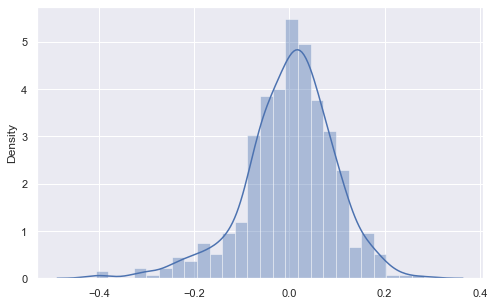

In [80]:
fig=plt.figure(figsize=(8,5))
sns.distplot(residual)
fig.show

# Final checking for multicollinearity between the independent feature variables using VIF.
#### for model ols_6 (trained on data x_train_new5)

In [81]:
vif = pd.DataFrame()
vif['column'] = x_train_new5.columns
vif['VIF_scores'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif = vif.sort_values(by = "VIF_scores", ascending = False)
vif

,column,VIF_scores
1,temp,3.921390
2,windspeed,3.603836
0,yr,1.992674
3,season_2,1.554778
8,weathersit_2,1.497137
4,season_4,1.378488
6,mnth_9,1.196470
7,weekday_2,1.178958
5,mnth_3,1.134372
9,weathersit_3,1.070362


## Outcomes
Here it can be seen there is very less multicolinearity between the independent feature as very less VIF scores can be seen.

# Predicting on test data using final model=ols_6

In [82]:
x_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.448866,0.462217,0,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.517138,0.347424,1,0,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.589974,0.212829,0,1,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.545416,0.478229,1,0,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.612254,0.080770,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [83]:
y_test.head()

22     0.110907
468    0.855729
553    0.534975
504    0.817648
353    0.428900
Name: cnt, dtype: float64

In [84]:
x_test.shape

(220, 29)

In [85]:
y_test.shape

(220,)

Since x_test here has all the columns containing independent features. So we need to extract out those columns which were selected in our final training model, i.e. in x_train_new5

Model will be predicted on the basis of ols_6.

In [86]:
col=x_train_new5.columns
col

Index(['yr', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_3', 'mnth_9',
       'weekday_2', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [87]:
x_test_new=x_test[col]
x_test_new

,yr,temp,windspeed,season_2,season_4,mnth_3,mnth_9,weekday_2,weathersit_2,weathersit_3
22,0,0.046591,0.462217,0,0,0,0,1,0,0
468,1,0.543115,0.347424,1,0,0,0,0,0,0
553,1,0.951196,0.212829,0,0,0,0,0,0,0
504,1,0.699909,0.478229,1,0,0,0,0,0,0
353,0,0.407087,0.080770,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
611,1,0.830744,0.441027,0,0,0,1,0,0,0
258,0,0.510926,0.292310,0,0,0,1,0,1,0
518,1,0.677065,0.333343,1,0,0,0,0,0,0
313,0,0.399819,0.343610,0,1,0,0,0,1,0


In [88]:
x_test_lm6 = sm.add_constant(x_test_new)

In [89]:
x_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   temp          220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   mnth_3        220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   weekday_2     220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [90]:
y_test_pred=ols_6.predict(x_test_lm6)

In [91]:
y_test_pred

22     0.038364
468    0.686811
553    0.860356
504    0.756864
353    0.396864
         ...   
611    0.853521
258    0.388088
518    0.766061
313    0.352150
483    0.684047
Length: 220, dtype: float64

# Model Evaluation Metrics

In [197]:
import sklearn.metrics as metrics

In [198]:
# mean absolute error
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mae

0.07458283969177867

In [200]:
# mean squared error
mse = metrics.mean_squared_error(y_test, y_test_pred)
mse

0.009493604450799128

In [201]:
#root mean squared error
rmse=np.sqrt(mse)
rmse

0.09743512944928605

In [202]:
# R-squared value
r2 = metrics.r2_score(y_test,y_test_pred)
r2

0.8027408112180062

In [206]:
# Adjusted R-squared value
# adj_r2=1-(1-r2)*(n-1)/(n-p-1)
# n=no. of rows in x(independent features); p=no. of columns(independent features)
n=x_test_new.shape[0]
p=x_test_new.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7933025725203031

In [209]:
#forming evaluation metrics
eva_met=pd.DataFrame()
eva_met['Mean_Absolute_error']=[mae]
eva_met['Mean_Squared_error']=[mse]
eva_met['Root_mean_squared_error']=[rmse]
eva_met['R_squared value']=[r2]
eva_met['Adjusted_R_squared_value']=[adj_r2]
eva_met

,Mean_Absolute_error,Mean_Squared_error,Root_mean_squared_error,R_squared value,Adjusted_R_squared_value
0,0.074583,0.009494,0.097435,0.802741,0.793303


### Comparision of R-square and Adjusted-R-square values of train and test models
From the models above we find out:

1. R-squared for train data= 0.823
2. R-squared for test data=  0.802
3. Adj. R-squared for train data= 0.820
4. Adj. R-squared for test data=  0.793

###### Conclusion: This seems to be generalised model, as accuracy for train and test almost same.

# Result

In [210]:
ols_6.params

const           0.115876
yr              0.229952
temp            0.575431
windspeed      -0.154206
season_2        0.082032
season_4        0.133573
mnth_3          0.045977
mnth_9          0.097666
weekday_2      -0.033045
weathersit_2   -0.074381
weathersit_3   -0.309456
dtype: float64

From the above analysis:
It can be clearly concluded that the feature variables that can be significant in the demand for shared bikes are
###### 1. Temperature(temp) :    As according to its coeff=0.5754, it can be seen as a unit increase in temp can increase the demand by 0.5745.
###### 2. Weather(weathersit_3):    As according to its coeff= -0.3094, it can be seen as a unit increase in weathersit_3 can deccrease the demand by 0.3094, as coeff is negetive.
###### 3. Year(yr):    As according to its coeff=0.2299, it can be seen as a unit increase in temp can increase the demand by 0.2299.